Using device: cuda


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

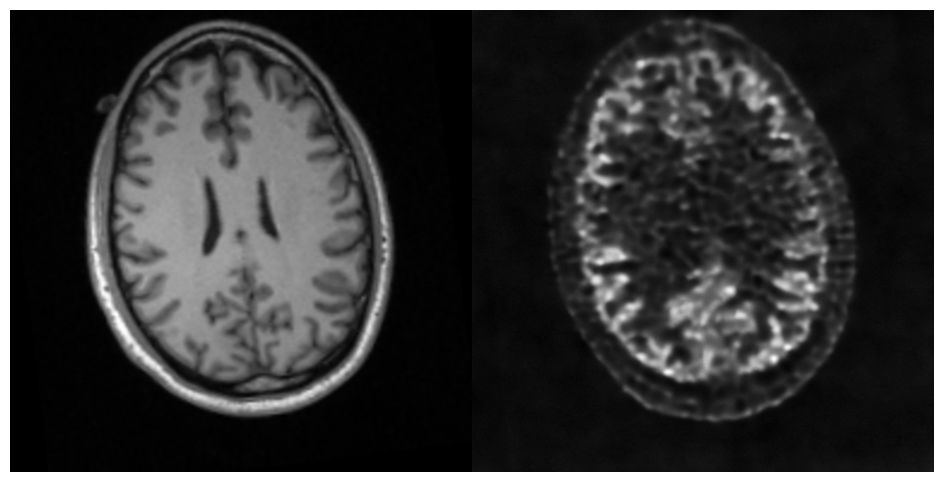

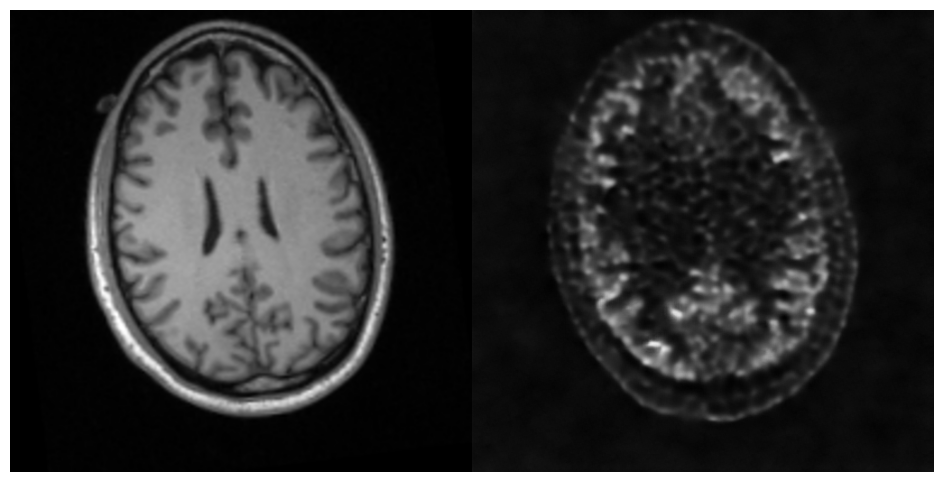

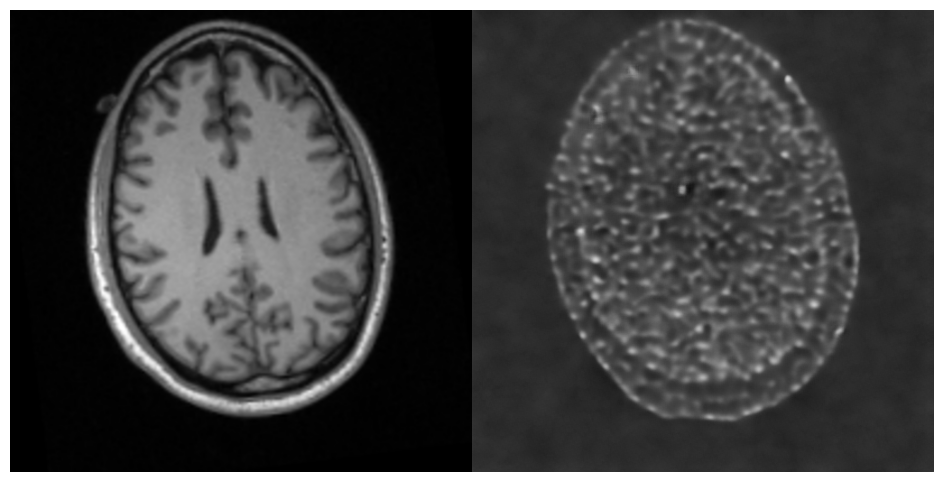

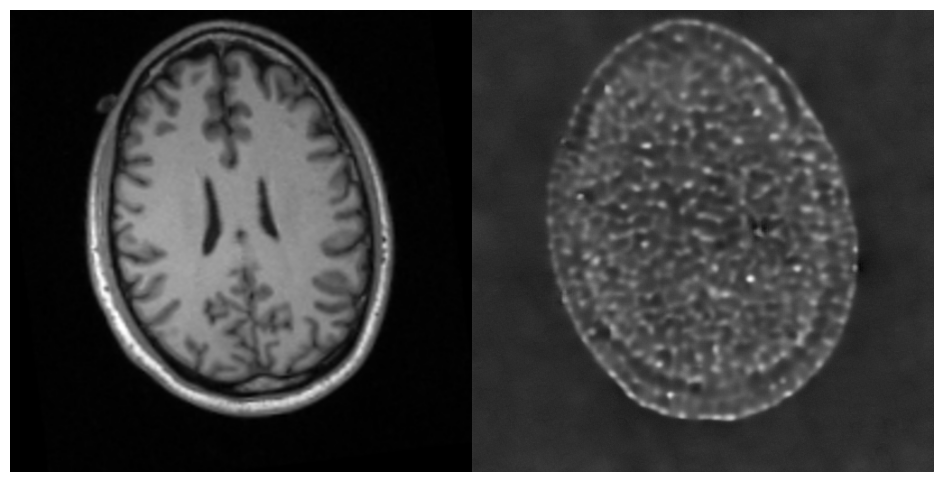

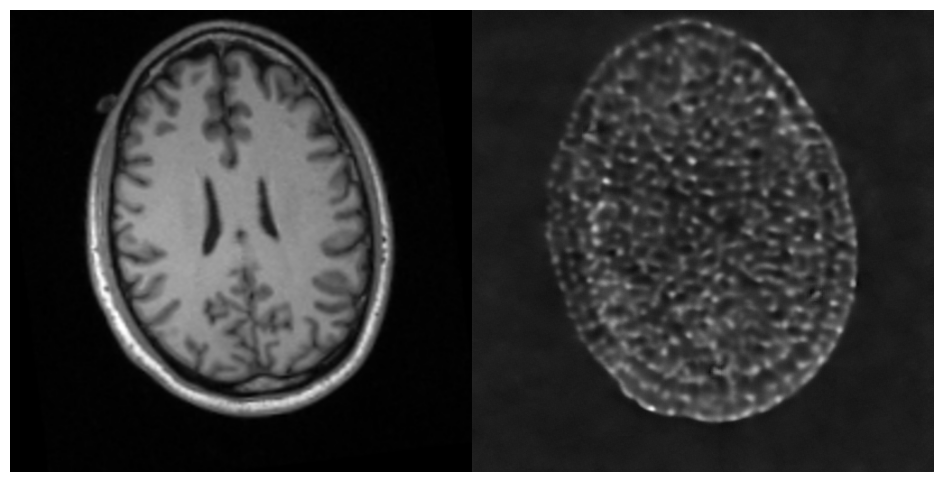

In [4]:
# Cell 1: Imports and setup
import torch
from src.model import setup_model
from src.inference import infer_later_mmse, infer_mr
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)

# Cell 2: Model and parameters setup
# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize model and generator
pipe, generator = setup_model(device=device)

# Parameters
image_guidance_scale = 1.5
guidance_scale = 2
num_inference_steps = 10
fileName = "example/mr_example1.png"

# Cell 3: Run inference
# Generate images for later stage
infer_later_mmse(pipe, fileName, image_guidance_scale, guidance_scale, num_inference_steps, generator)



  0%|          | 0/10 [00:00<?, ?it/s]

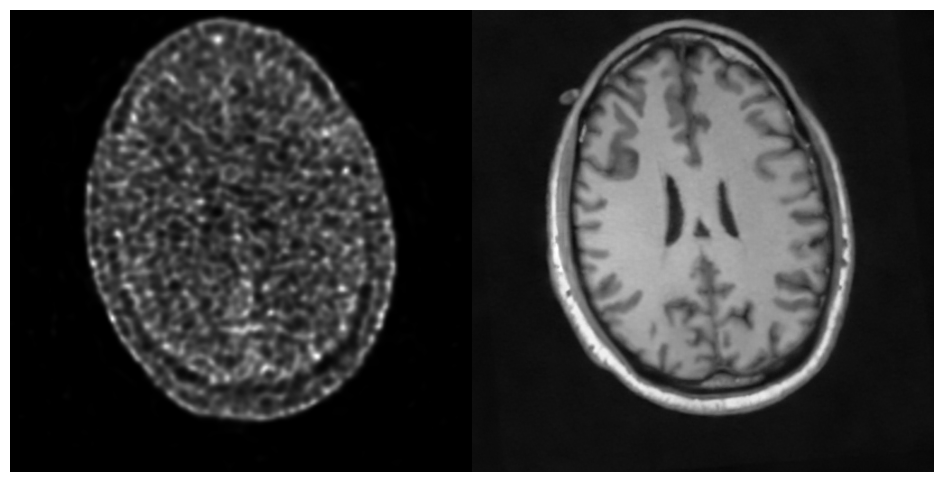

In [5]:
fileName = "example/tau_later_example.png"

# Cell 3: Run inference
# Generate images for later stage
infer_mr(pipe, fileName, image_guidance_scale, guidance_scale, num_inference_steps, generator)

